In [1]:
%pip install -U scikit-learn scipy matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# forrest alg help from: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset.csv')
# dropping unecessary columns
df = df.drop(['Application order', 'Nacionality', 'International',
              'Inflation rate', 'GDP', 'Unemployment rate', 'Displaced'], axis=1)
df = df[df.Target != 'Enrolled']

df['Target'] = pd.factorize(df['Target'])[0] # 0 - dropout, 1- graduate 

print("Shape: ", df.shape)
df.head(5)


Shape:  (3630, 28)


,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,8,2,1,1,13,10,6,10,0,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,6,11,1,1,1,3,4,4,0,...,6,14.000000,0,0,6,6,6,13.666667,0,1
2,1,1,5,1,1,22,27,10,10,0,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,8,15,1,1,23,27,6,4,0,...,6,13.428571,0,0,6,10,5,12.400000,0,1
4,2,12,3,0,1,22,28,10,10,0,...,5,12.333333,0,0,6,6,6,13.000000,0,1


In [3]:
# Putting feature variable to X
x = df.drop('Target', axis=1)
# Putting response variable to y
y = df['Target']

In [4]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=42)
x_train.shape, x_test.shape

((2541, 27), (1089, 27))

In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=40,
                                       n_estimators=200, oob_score=True)

classifier_rf.fit(x_train, y_train)
# checking the oob score
classifier_rf.oob_score_


0.9047619047619048

In [74]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 50, 100, 200],
    'n_estimators': [5, 15, 30, 50, 100, 200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 50, 100, 200],
                         'n_estimators': [5, 15, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [75]:
grid_search.best_score_


0.8961069430000494

In [76]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

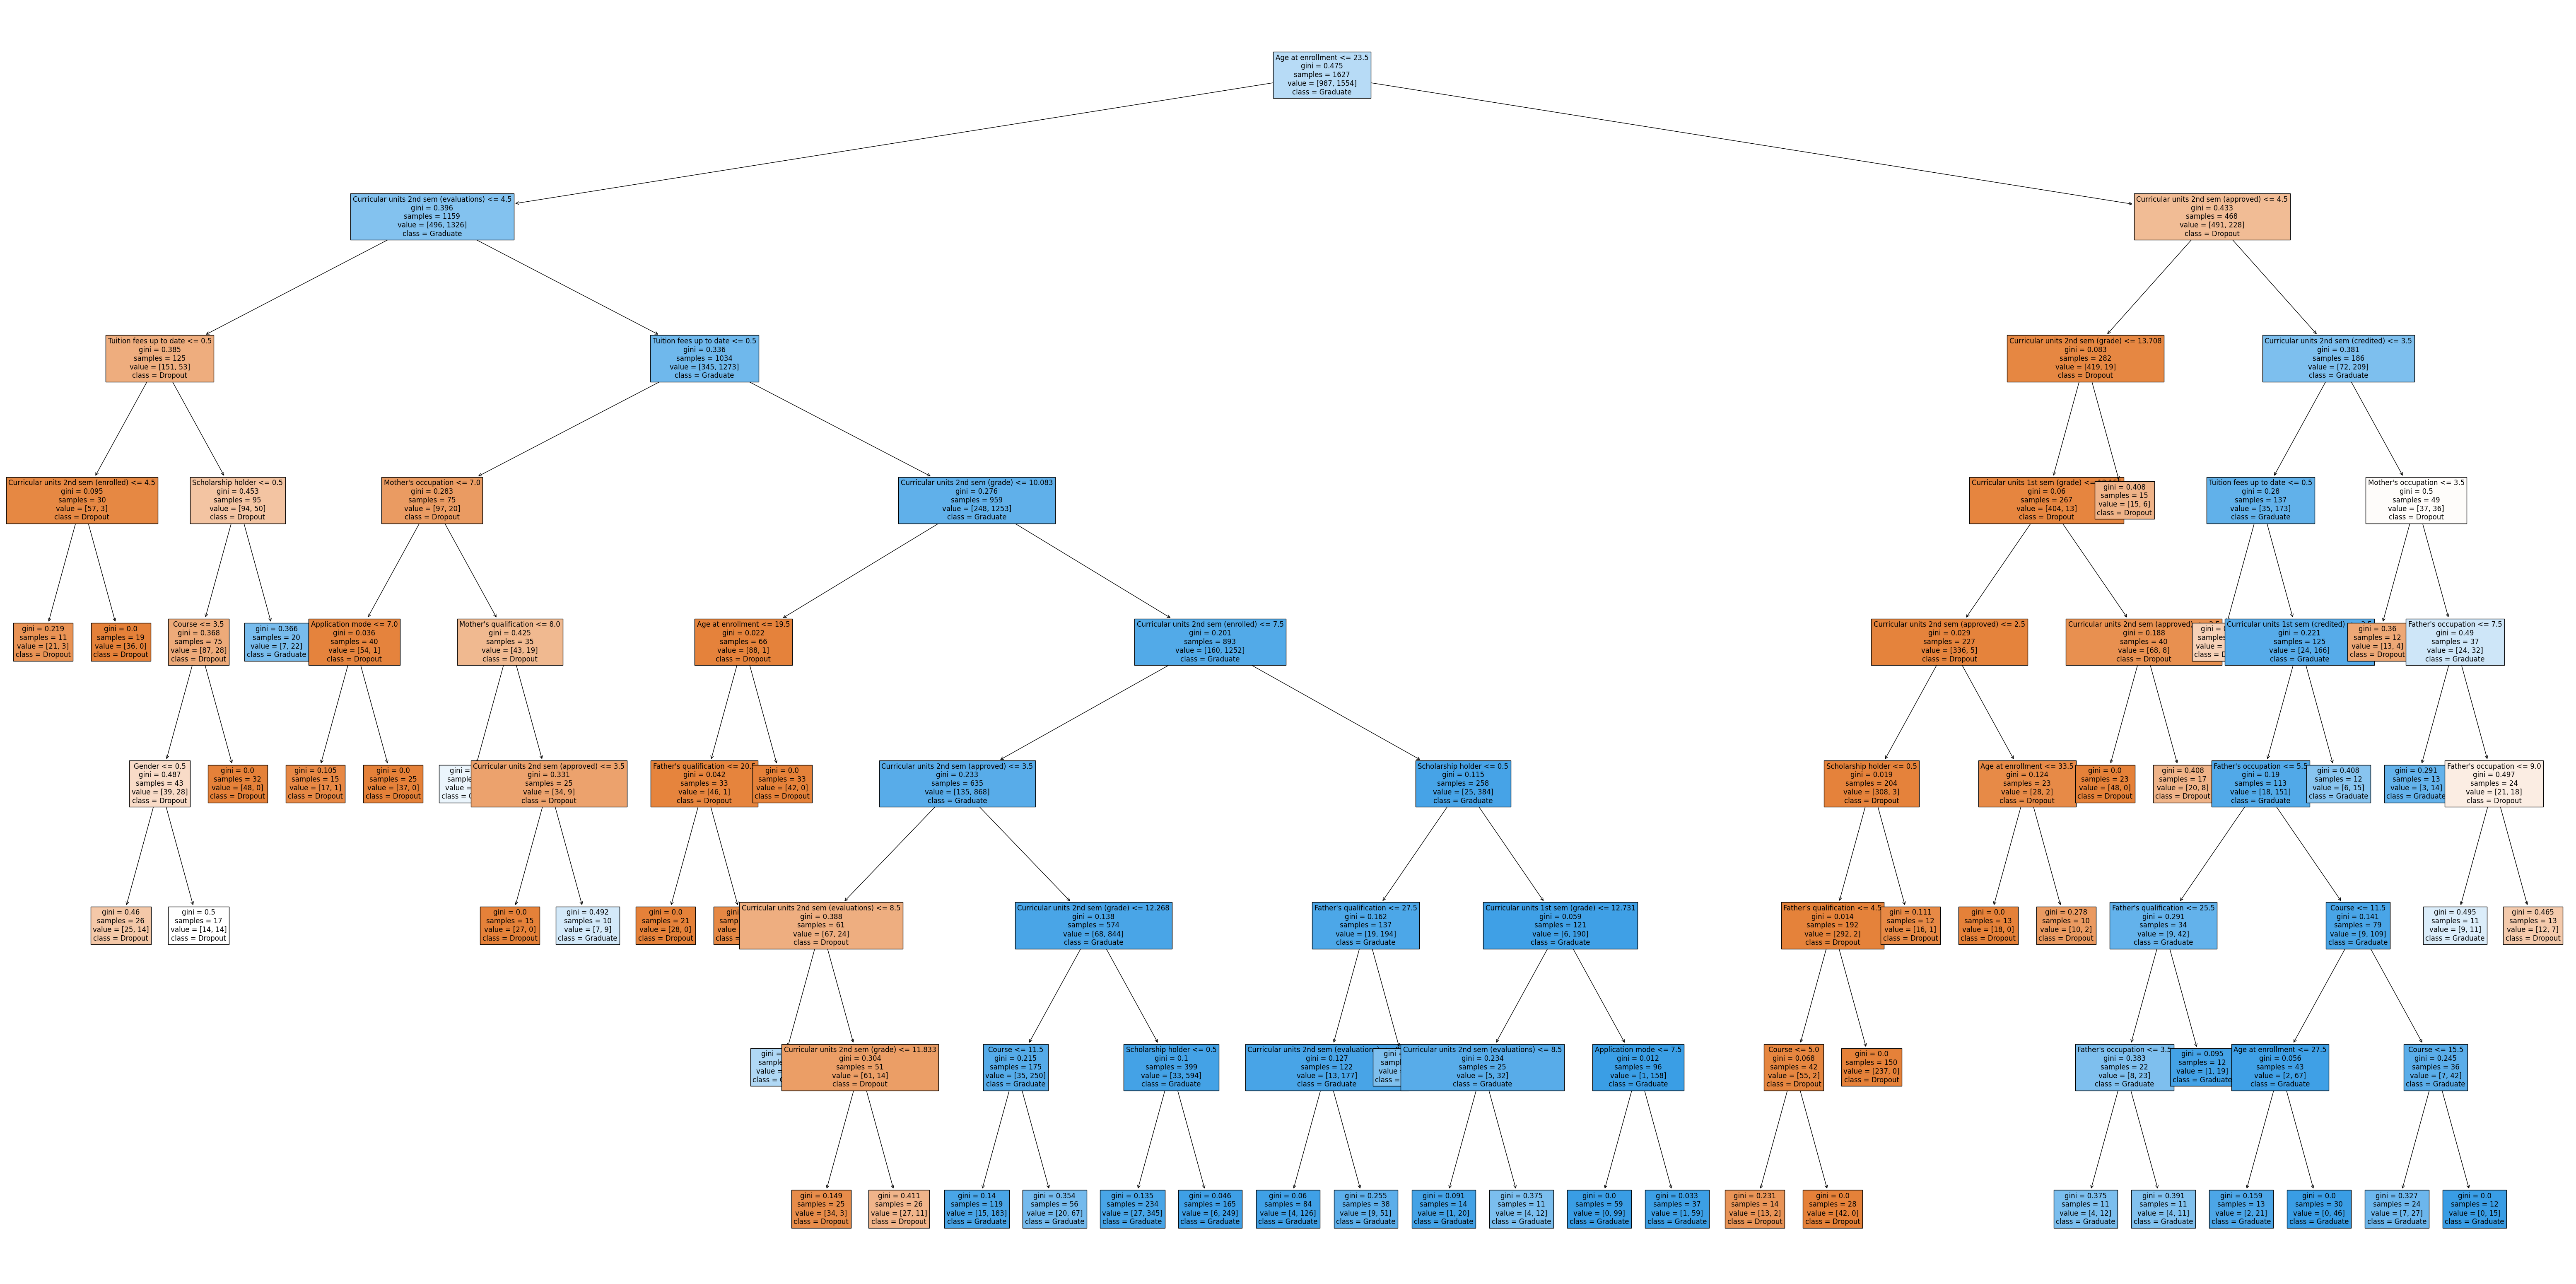

In [77]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[8], feature_names = x.columns,class_names=['Dropout', "Graduate"],filled=True, fontsize=12);

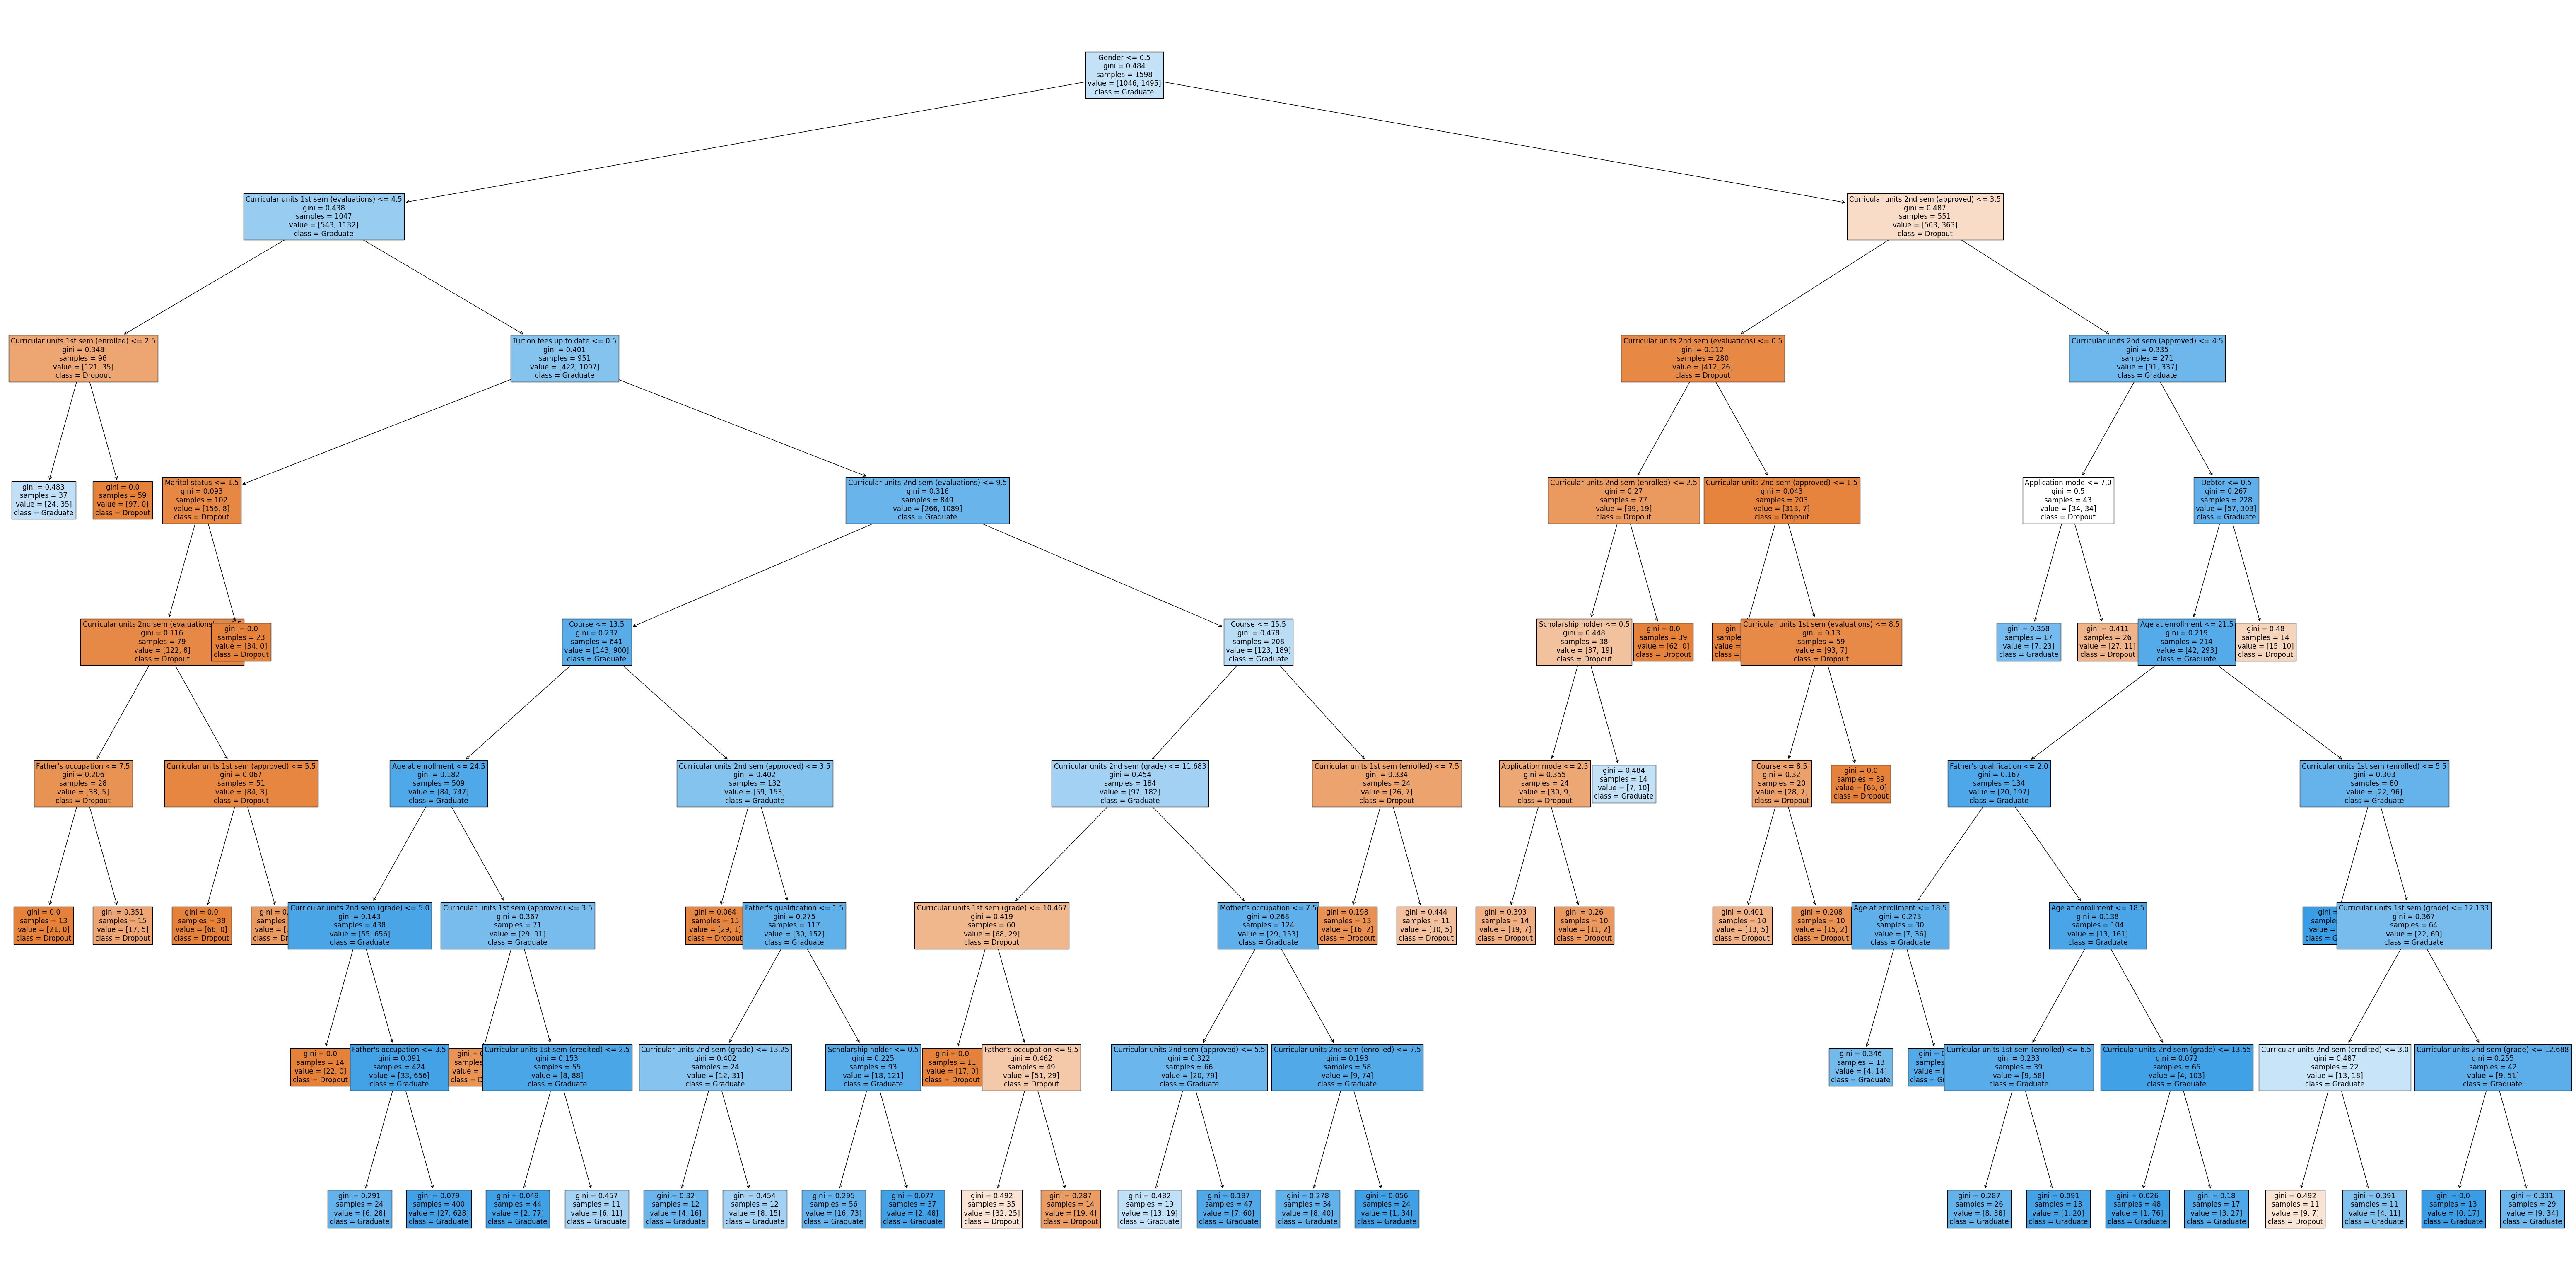

In [78]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[3], feature_names = x.columns,class_names=['Dropout', "Graduate"],filled=True, fontsize=12);

In [79]:
rf_best.feature_importances_

imp_df = pd.DataFrame({
    "Column": x_train.columns,
    "Importance": rf_best.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Column,Importance
24,Curricular units 2nd sem (approved),0.333199
18,Curricular units 1st sem (approved),0.159968
25,Curricular units 2nd sem (grade),0.126801
19,Curricular units 1st sem (grade),0.093903
11,Tuition fees up to date,0.076502
23,Curricular units 2nd sem (evaluations),0.034553
14,Age at enrollment,0.033177
2,Course,0.018604
16,Curricular units 1st sem (enrolled),0.017977
13,Scholarship holder,0.017397
